# AiFit Skeletonization

## Import Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from cv2 import imread,imshow
from skimage import transform
import cv2
import mediapipe as mp

%matplotlib inline

In [58]:
labels=list()
training_path='DATASET/TRAIN/'
testing_path='DATASET/TEST/'
os.listdir(training_path)
for i in os.listdir(training_path):
    labels.append(i)

In [59]:
labels

['downdog', 'goddess', 'plank', 'tree', 'warrior2']

In [60]:
marked_training_path='DATASET/Marked_train/'
marked_testing_path='DATASET/Marked_test/'

In [61]:
try:
    for i in labels:
        os.mkdir(marked_training_path+i+'/')
        os.mkdir(marked_testing_path+i+'/')
except:
    pass

In [62]:
def total_sample_count(path):
    Total_sample=0
    for i in os.listdir(training_path):
        print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
        Total_sample+=len(os.listdir(os.path.join(path,i)))
    print(f'Total Samples:{Total_sample}')

In [63]:
total_sample_count(training_path)

Length of :downdog= 223
Length of :goddess= 180
Length of :plank= 266
Length of :tree= 158
Length of :warrior2= 252
Total Samples:1079


In [64]:
total_sample_count(testing_path)

Length of :downdog= 97
Length of :goddess= 80
Length of :plank= 115
Length of :tree= 69
Length of :warrior2= 109
Total Samples:470


## Skeletionization On Image Using Mediapipe

<h3 style="text-align:center">Mediapipe Joints</h3>
<br>
<br>

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [65]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [66]:
def detectPose(image_pose, pose, draw=False, display=False):
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB)
    resultant = pose.process(image_in_RGB)
    marked_img = np.zeros(image_pose.shape)
    if resultant.pose_landmarks and draw:    
        mp_drawing.draw_landmarks(image=marked_img, landmark_list=resultant.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS,
                                  landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
                                                                               thickness=6, circle_radius=3),
                                  connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
                                                                               thickness=3, circle_radius=2))

    if display:
            plt.figure(figsize=[5,5])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(marked_img[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

    else:
        return image_pose, marked_img

In [67]:
# image_path = 'DATASET/TRAIN/tree/00000070.jpg'
# output = imread(image_path)
# detectPose(output, pose_image, draw=True, display=True)
# X_train_original = []
# X_train_marked = []
# for i in X_train:
#     original_image, results = detectPose(i, pose_image, draw=True, display=False)
#     X_train_marked.append(results)
image_path = 'DATASET/TRAIN/downdog/00000147.jpg'
img_file=imread(image_path)
original_image, results = detectPose(img_file, pose_image, draw=True, display=False)


In [72]:
from tqdm import tqdm
def save_marked_images(path, m_path):
    i=0
    for idx,img in enumerate(os.listdir(path)):
        for img_name in tqdm(os.listdir(path+img)):
            if i<300:
                img_file=imread(path+img+'/'+img_name)
                if img_file is not None:
                    original_image, results = detectPose(img_file, pose_image, draw=True, display=False)
                    if not np.all((results == 0)):
                        results = cv2.resize(results,(256,256))
                        cv2.imwrite(m_path+img+'/'+img_name, results)
            else:
                break
            i=i+1
        i=0

## Saving Marked Images

In [73]:
save_marked_images(training_path, marked_training_path)

100%|████████████████████████████████████████████████████████████████████████████████| 252/252 [00:31<00:00,  7.91it/s]


In [74]:
save_marked_images(testing_path, marked_testing_path)

100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:16<00:00,  6.52it/s]


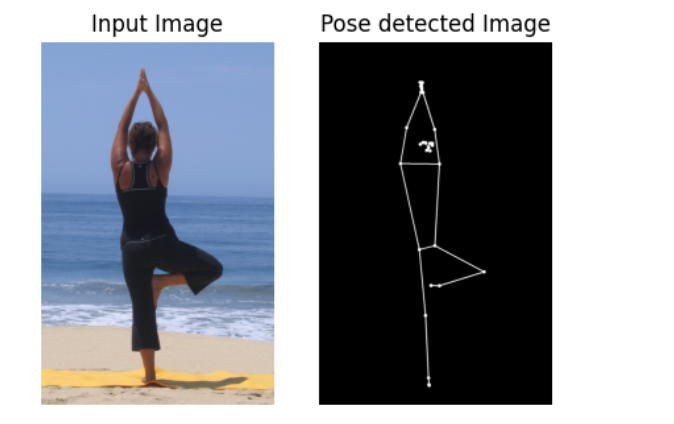